# Regression mit $\sin$ und $\cos$

$$
f = \frac14~\text{Hz} \\
\quad y(t) = a \cos(\omega t) + b \sin(\omega t) + c \\
\omega=2\pi f = \frac\pi2
$$

## Daten

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=4)

In [2]:
t = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([46, 43, -37, -38, 47, 41, -36])

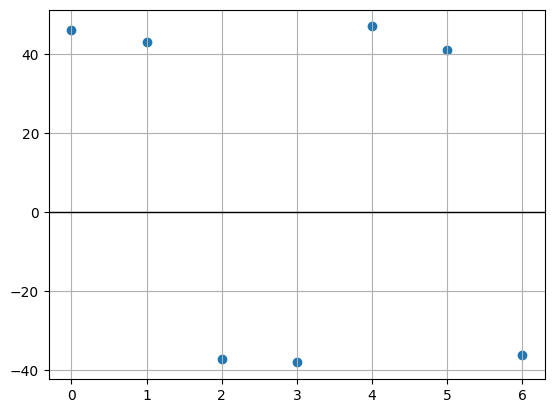

In [3]:
plt.scatter(t, y)
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.show()

## Normalengleichung

$$
\mathbf{X}^T \mathbf{X} \cdot
\begin{bmatrix}
    a \\ b \\ c
\end{bmatrix}
= \mathbf{X}^T \mathbf{y}
$$

In [4]:
omega = np.pi / 2
n = len(t)

X = np.vstack([np.cos(omega * t), np.sin(omega * t), np.ones(n)]).T
print(X)

[[ 1.  0.  1.]
 [ 0.  1.  1.]
 [-1.  0.  1.]
 [-0. -1.  1.]
 [ 1. -0.  1.]
 [ 0.  1.  1.]
 [-1.  0.  1.]]


In [5]:
XTX = np.matmul(X.T, X)
print(XTX)

XTy = np.matmul(X.T, y)
print(XTy)

[[ 4. -0.  0.]
 [-0.  3.  1.]
 [ 0.  1.  7.]]
[166. 122.  66.]


## Lösung

$\mathbf{X}^T \mathbf{X} \cdot \mathbf{w} = \mathbf{X}^T \mathbf{y}$

$\Rightarrow$ LGS nach $\mathbf{w}$ lösen

In [6]:
W = np.linalg.lstsq(XTX, XTy, rcond=None)[0]
print(W)

[41.5 39.4  3.8]


## Resultierende Regressionsgleichung

In [7]:
def reg(t):
    return W[0] * np.cos(omega * t) + W[1] * np.sin(omega * t) + W[2]

In [8]:
print(f'y(t) = {W[0]:.4f} * cos(wt) + {W[1]:.4f} * sin(wt) + {W[2]:.4f}')

y(t) = 41.5000 * cos(wt) + 39.4000 * sin(wt) + 3.8000


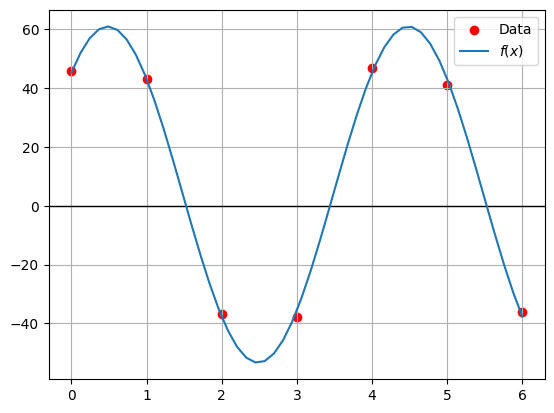

In [9]:
plt.scatter(t, y, color='red', label='Data')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)

x_plot = np.linspace(0, t[-1])
plt.plot(x_plot, reg(x_plot), label='$f(x)$')

plt.legend()
plt.show()

## Prognose

In [10]:
np.round(reg(9), decimals=4)

43.2